In [1]:
import numpy as np
from copy import deepcopy

from PIL import Image
import imageio

import matplotlib.pyplot as plt
%matplotlib inline

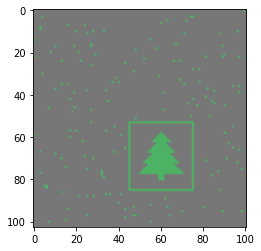

In [2]:
def get_robots(data):
    positions = []
    velocitys = []
    
    for line in data:
        p, v = line.strip().split()
        
        p = p[2:]
        x, y = p.split(',')
        positions.append([int(x),int(y)])
        
        v = v[2:]
        x, y = v.split(',')
        velocitys.append([int(x),int(y)])
        
    return np.array(positions), np.array(velocitys)

def run_robots(positions, velocitys, time=100, x=101, y=103):
    
    for t in range(1, time+1):
        positions += velocitys
        
        bad_x = np.where(positions[:,0] >= x)[0]
        positions[bad_x,0] -= x
        bad_x = np.where(positions[:,0] < 0)[0]
        positions[bad_x,0] += x
        
        bad_y = np.where(positions[:,1] >= y)[0]
        positions[bad_y,1] -= y
        bad_y = np.where(positions[:,1] < 0)[0]
        positions[bad_y,1] += y
        
    return positions

def quadrant_count(positions, x=101, y=103):
    q = []
    x0 = x//2
    y0 = y//2
    
    in_q = np.where(np.logical_and(positions[:,0] < x0, positions[:,1] < y0))[0]
    q.append(len(in_q))
    
    in_q = np.where(np.logical_and(positions[:,0] < x0, positions[:,1] > y0))[0]
    q.append(len(in_q))
    
    in_q = np.where(np.logical_and(positions[:,0] > x0, positions[:,1] < y0))[0]
    q.append(len(in_q))
    
    in_q = np.where(np.logical_and(positions[:,0] > x0, positions[:,1] > y0))[0]
    q.append(len(in_q))
    
    return np.array(q)

def make_frames(x=101, y=103, time=6377):
    with open('input_day14.txt', 'r') as f:
        data = f.readlines()
        f.close()
    
    positions, velocitys = get_robots(data)
    image = np.ones((y,x,3), dtype=int)*119
    for position in positions:
        image[position[1],position[0]] = np.array([78,178,101])

    frame = Image.fromarray(image.astype('uint8'), mode='RGB')
    frame = frame.resize((image.shape[0]*8,image.shape[1]*8), resample=Image.NEAREST)
    frame.save('./Day14-Frames/day14_'+str(0).zfill(4)+'.png')
    
    for t in range(1, time+1):
        positions = run_robots(positions, velocitys, 1, x, y)
        
        image = np.ones((y,x,3), dtype=int)*119
        for position in positions:
            image[position[1],position[0]] = np.array([78,178,101])
        
        frame = Image.fromarray(image.astype('uint8'), mode='RGB')
        frame = frame.resize((image.shape[0]*8,image.shape[1]*8), resample=Image.NEAREST)
        frame.save('./Day14-Frames/day14_'+str(t).zfill(4)+'.png')
        
    plt.imshow(image)
    plt.show()
    
make_frames()

In [5]:
from shutil import copy
for t in range(6377+1, 6377+121):
    copy('./Day14-Frames/day14_6377.png', './Day14-Frames/day14_'+str(t).zfill(4)+'.png')